In [1]:
import esm
import sys
sys.path.append("../../preprocessing")
from preprocessing.protein import create_shared_protein_hypergraph

/Users/simon/Documents/git/paper/hyperdti/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model, alphabet = esm.pretrained.esm1b_t33_650M_UR50S()

In [3]:
sequence = "MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLSVSYDQATSLRILNNGHAFNVEFDDSQDKAVLKGGPLDGTYRLIQFHFHWGSLDGQGSEHTVDKKKYAAELHLVHWNTKYGDFGKAVQQPDGLAVLGIFLKVGSAKPGLQKVVDVLDSIKTKGKSADFTNFDPRGLLPESLDYWTYPGSLTTPPLLECVTWIVLKEPISVSSEQVLKFRKLNFNGEGEPEELMVDNWRPAQPLKNRQIKASFK"
sequence2="HHSTVADGLITTLHYPAPKRNKPTVYGVSPNYDKWEMERTDITMKHKLGGGQYGEVYEGVWKKYSLTVAVKTLKEDTMEVEEFLKEAAVMKEIKHPNLVQLLGVCTREPPFYIITEFMTYGNLLDYLRECNRQEVNAVVLLYMATQISSATEYLEKKNFIHRDLAARNCLVGENHLVKVADFGLSRLMTGDTYTAHAGAKFPIKWTAPESLAYNKFSIKSDVWAFGVLLWEIATYGMSPYPGIDLSQVYELLEKDYRMERPEGCPEKVYELMRACWQWNPSDRPSFAEIHQAFETMFQES"


BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.
Some weights of the model checkpoint at Rostlab/prot_bert_bfd were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight'

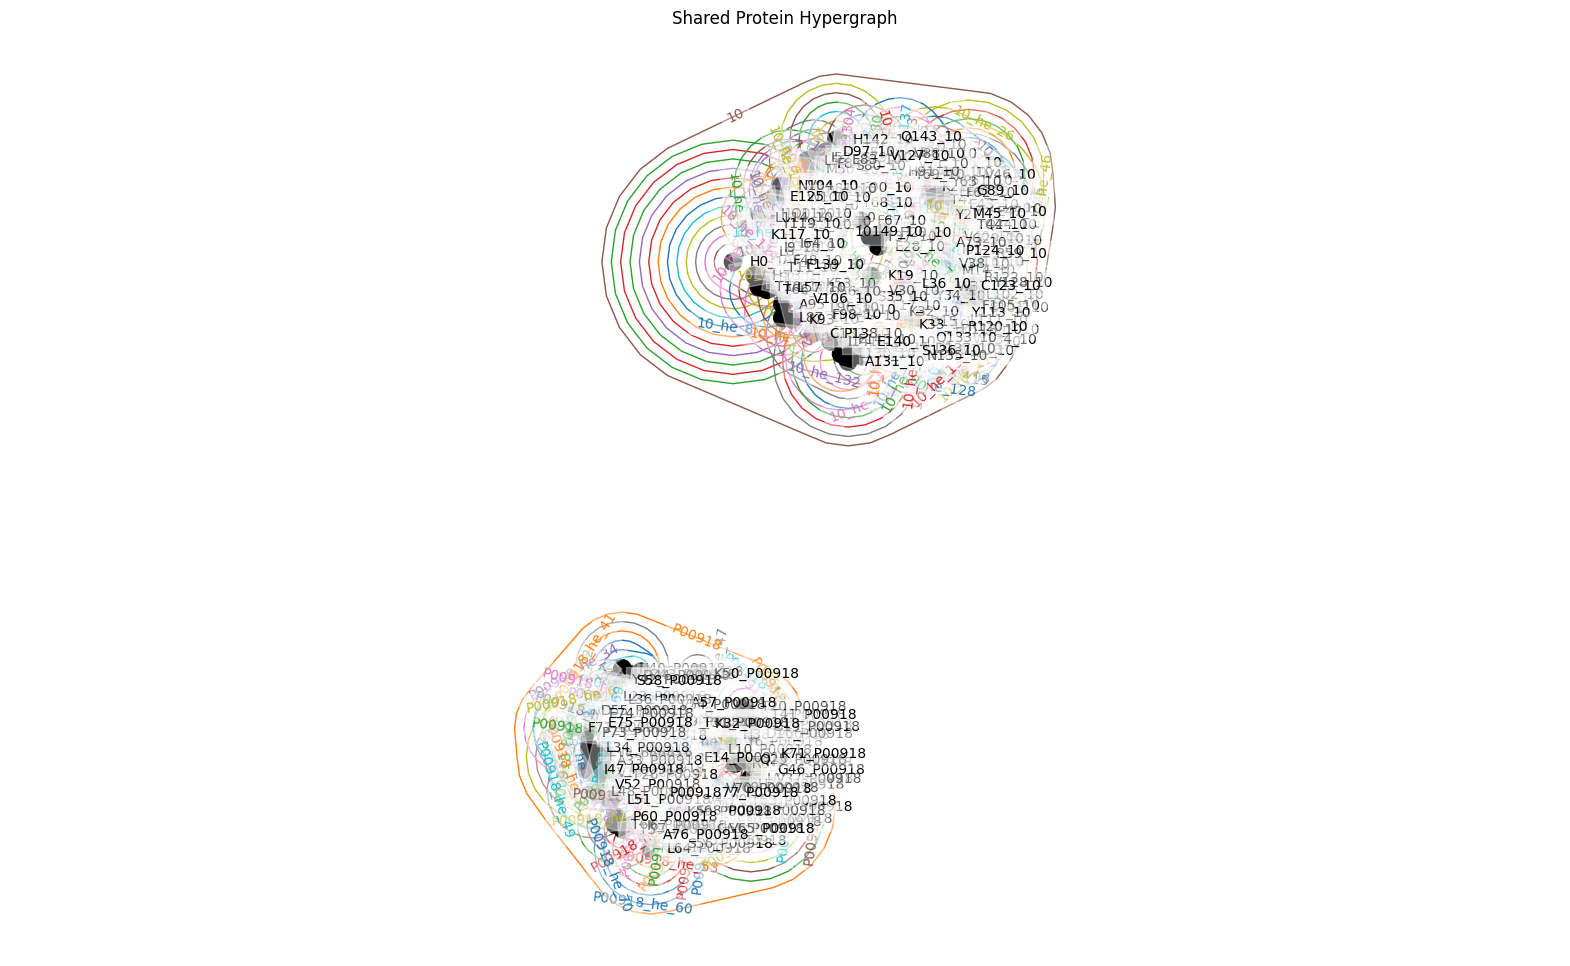

In [4]:
global_node_labels, global_hyperedges, global_node_features = create_shared_protein_hypergraph([
    ("P00918", sequence),
       ("10", sequence2),
], model, alphabet)

In [5]:
global_node_features

[array([-2.04338684e+01, -2.23876724e+01, -2.22917156e+01, -2.54457703e+01,
        -2.31562843e+01, -2.46699512e-01, -2.75558996e+00, -5.88371277e-01,
        -2.75456190e+00, -2.96474218e+00, -1.18280590e+00, -3.03908968e+00,
        -3.06995702e+00, -5.01410007e-01, -3.33396077e+00, -3.06149745e+00,
        -3.34181190e+00, -2.69560981e+00, -2.21239042e+00,  5.78526080e-01,
         1.46924913e-01, -2.44709730e+00, -1.40964305e+00,  8.73374939e-03,
         1.31853228e+01, -6.33647203e-01, -2.07672081e+01, -2.38066044e+01,
        -2.15511360e+01, -2.17393665e+01]),
 array([-23.45487595, -22.06213951, -26.42878723, -23.07701302,
        -22.62780952,   0.35233322,  -0.26963031,  -2.41656756,
         -0.67144221,   0.44245926,  -0.89895892,  -2.24620414,
         -0.60698688,  -0.82528913,  -3.80205631,  -0.6761207 ,
          0.2052945 ,  -1.52959609,  12.33411884,  -3.61717606,
         -3.8781755 ,   0.37757939,   0.39214787,  -1.39094818,
         -4.09498501,  -3.82912111, -22.